In [1]:
import matpower
matpower.__version__

'7.1.0.2.1.4'

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matpower import path_matpower
from matpowercaseframes import CaseFrames

In [3]:
path = os.path.join(path_matpower, 'data/case9.m')
cf = CaseFrames(path)
cf.gencost

,MODEL,STARTUP,SHUTDOWN,NCOST,COST_2,COST_1,COST_0
1,2,1500,0,3,0.1100,5.0,150
2,2,2000,0,3,0.0850,1.2,600
3,2,3000,0,3,0.1225,1.0,335


In [4]:
pmin_pmax = cf.gen.loc[:, ['PMIN', 'PMAX']]
pmin_pmax

,PMIN,PMAX
1,10,250
2,10,300
3,10,270


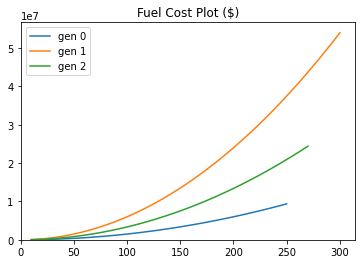

In [5]:
# this logic of plot only support quadratic
n_gen = len(cf.gen.index)
x = [None] * n_gen
y = [None] * n_gen
for i in range(n_gen):
    pmin, pmax = cf.gen['PMIN'].iloc[i], cf.gen['PMAX'].iloc[i]
    coeff = cf.gencost[['COST_0', 'COST_1', 'COST_2']].iloc[i].values
    x[i] = np.linspace(pmin, pmax, 100, endpoint=True)
    y[i] = [np.polyval(coeff, x_) for x_ in x[i]]
    plt.plot(x[i], y[i], label=f"gen {i}")
    plt.legend(loc="best")
plt.axis([0, None, 0, None])
plt.title("Fuel Cost Plot ($)")
plt.show()

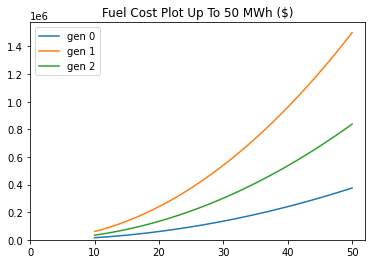

In [6]:
# this logic of plot only support quadratic
n_gen = len(cf.gen.index)
x = [None] * n_gen
y = [None] * n_gen
for i in range(n_gen):
    pmin, pmax = cf.gen['PMIN'].iloc[i], 50
    coeff = cf.gencost[['COST_0', 'COST_1', 'COST_2']].iloc[i].values
    x[i] = np.linspace(pmin, pmax, 100, endpoint=True)
    y[i] = [np.polyval(coeff, x_) for x_ in x[i]]
    plt.plot(x[i], y[i], label=f"gen {i}")
    plt.legend(loc="best")
plt.axis([0, None, 0, None])
plt.title("Fuel Cost Plot Up To 50 MWh ($)")
plt.show()

In [7]:
df_components_pmin = cf.gencost[['COST_2', 'COST_1', 'COST_0']].copy()
df_components_pmin.columns = ['A', 'B', 'C']
df_components_pmin.loc[:, 'A'] = df_components_pmin['A'].values * cf.gen['PMIN'].values * cf.gen['PMIN'].values
df_components_pmin.loc[:, 'B'] = df_components_pmin['B'].values * cf.gen['PMIN'].values
df_components_pmin

,A,B,C
1,11.00,50.0,150
2,8.50,12.0,600
3,12.25,10.0,335


In [8]:
df_components_pmax = cf.gencost[['COST_2', 'COST_1', 'COST_0']].copy()
df_components_pmax.columns = ['A', 'B', 'C']
df_components_pmax.loc[:, 'A'] = df_components_pmax['A'].values * cf.gen['PMAX'].values * cf.gen['PMAX'].values
df_components_pmax.loc[:, 'B'] = df_components_pmax['B'].values * cf.gen['PMAX'].values
df_components_pmax

,A,B,C
1,6875.00,1250.0,150
2,7650.00,360.0,600
3,8930.25,270.0,335
